In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [43]:
df=df.dropna()

In [8]:
avg_temp=df.groupby('City')['AverageTemperature'].mean()
avg_temp

City
A Coruña    13.147277
Aachen       8.825173
Aalborg      7.695135
Aba         26.612824
Abadan      25.034749
              ...    
Århus        7.695135
Çorlu       13.319012
Çorum        9.957553
Öskemen      1.308672
Ürümqi       5.930795
Name: AverageTemperature, Length: 3448, dtype: float64

Year
1743    6.068000
1744    9.007125
1745    0.026500
1750    8.725545
1751    8.046375
Name: AverageTemperature, dtype: float64


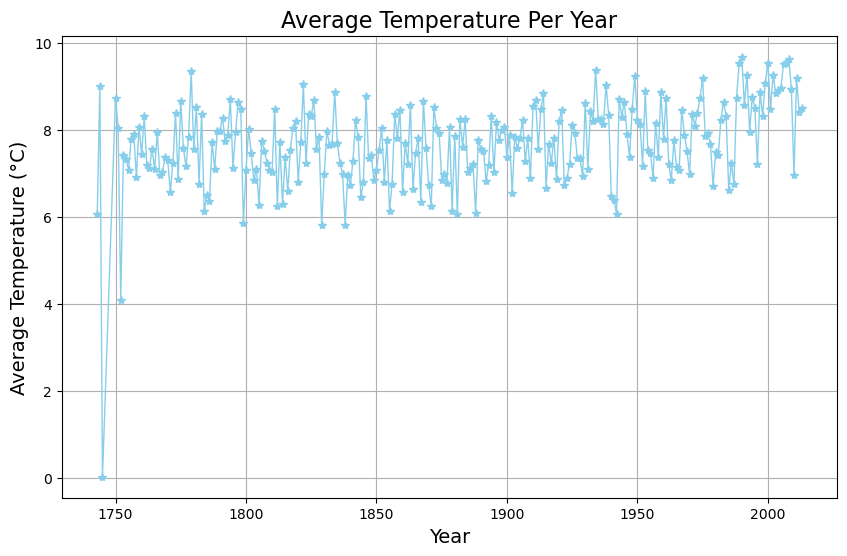

In [20]:
# Ensure the 'dt' column is in datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Drop rows with missing values in the 'AverageTemperature' column
df_cleaned = df.dropna(subset=['AverageTemperature'])

# Extract the year from the 'dt' column
df_cleaned['Year'] = df_cleaned['dt'].dt.year


# Filter data for a specific city (e.g., Århus)
city = 'Århus'
city_data = df_cleaned[df_cleaned['City'] == city]

# Calculate the average temperature per year
avg_temp_city = city_data.groupby('Year')['AverageTemperature'].mean()
print(avg_temp_city.head())

# Plot the graph
plt.figure(figsize=(10, 6))
avg_temp_city.plot(kind='line', color='skyblue',marker='*',linewidth=1)
plt.title('Average Temperature Per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.grid(True)
plt.show()


In [17]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
Year                             0
dtype: int64

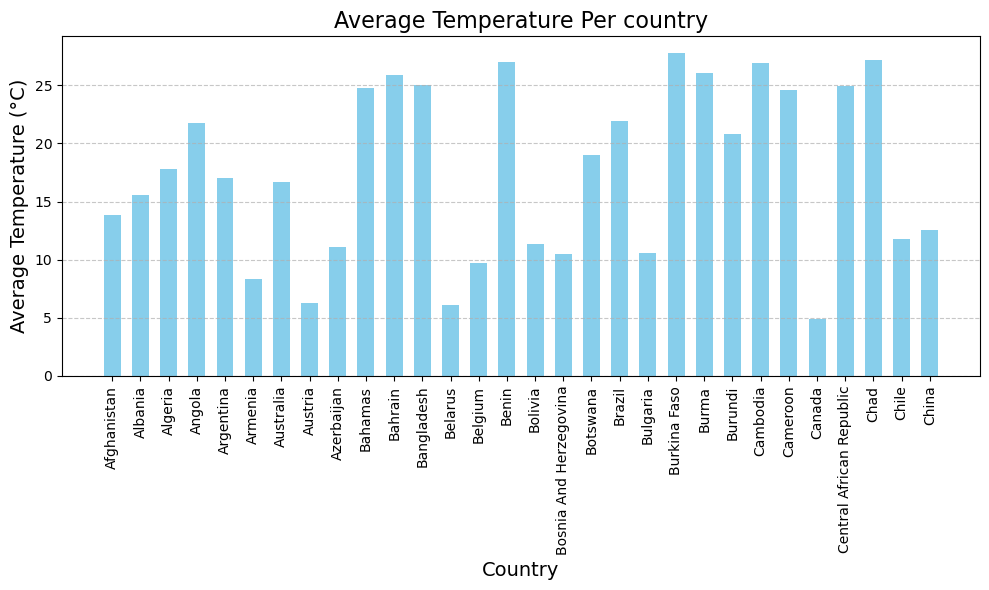

In [42]:
x=df['Country']
avg_temp=df.groupby('Country')['AverageTemperature'].mean()


# Select the top 30 countries with the highest average temperature
#top_30_countries = avg_temp.nlargest(30)
top_30_countries=avg_temp.head(30)
#top_30_countries = avg_temp.nsmallest(30)

plt.figure(figsize=(10, 6))
plt.bar(top_30_countries.index,top_30_countries.values,color='skyblue',width=0.6)
plt.title('Average Temperature Per country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Average Temperature (°C)', fontsize=14)
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for y-axis
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()



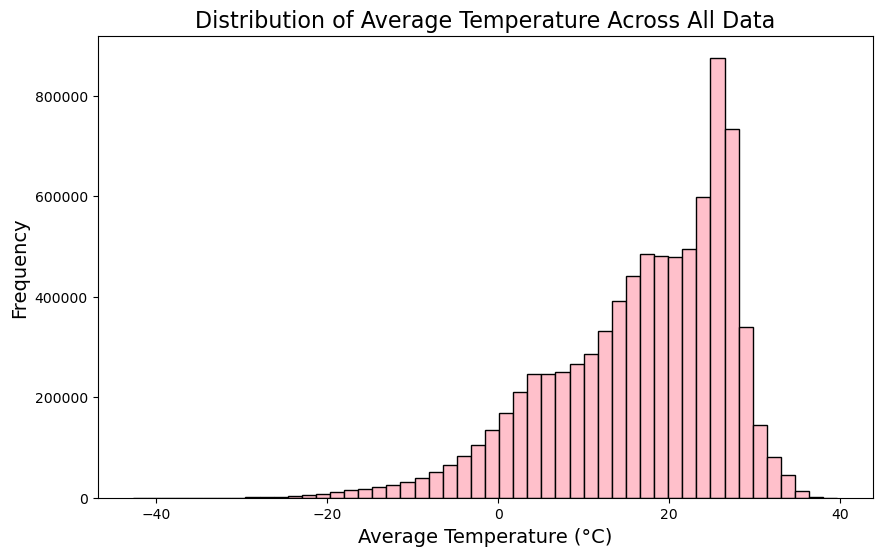

In [50]:
#Plot the histogram of 'AverageTemperature'
plt.figure(figsize=(10, 6))
plt.hist(df['AverageTemperature'].dropna(), bins=50, color='pink', edgecolor='black')

plt.title('Distribution of Average Temperature Across All Data', fontsize=16)
plt.xlabel('Average Temperature (°C)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

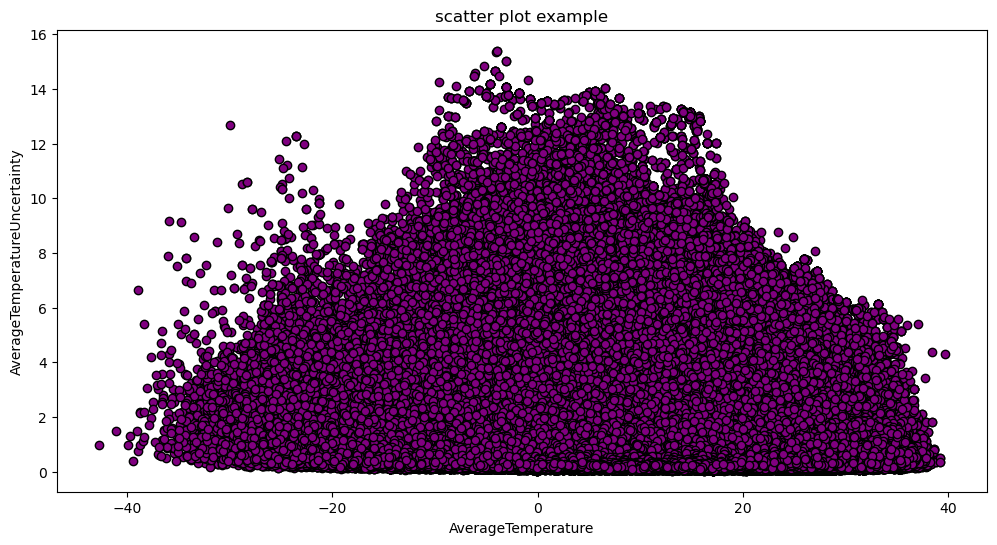

In [67]:
x=df['AverageTemperature'].dropna()
y=df['AverageTemperatureUncertainty'].dropna()
plt.figure(figsize=(12,6))
plt.scatter(x,y,color='purple',edgecolor='black')
plt.xlabel('AverageTemperature')
plt.ylabel('AverageTemperatureUncertainty')
plt.title("scatter plot example")

plt.show()

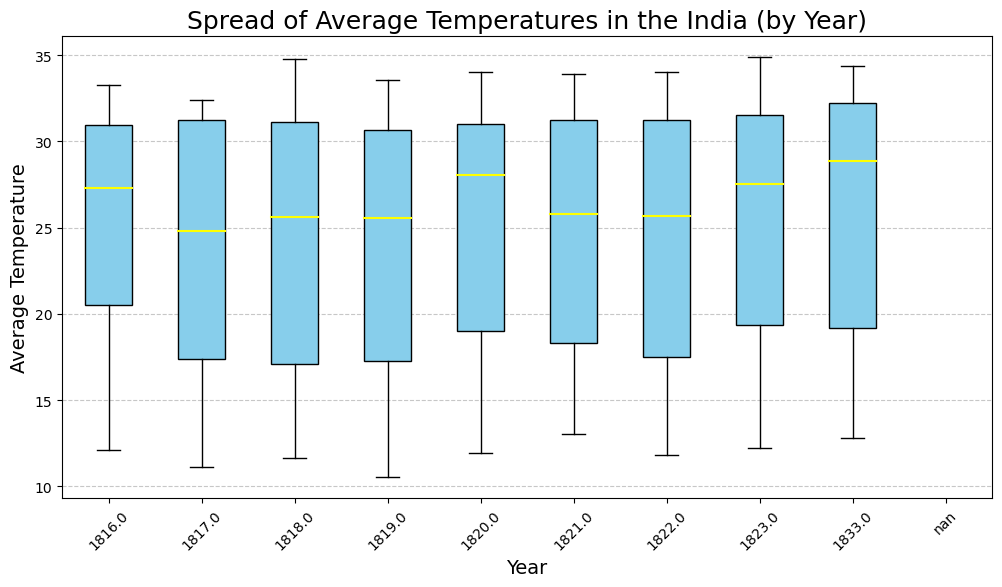

In [76]:
import matplotlib.pyplot as plt

# Filter the dataset for the specific country
country_data = df[df['Country'] == 'India'].dropna()

# Extract the relevant data: Year and AverageTemperature
country_data['Year'] = pd.to_datetime(country_data['dt']).dt.year.head(100)
temperature_data = country_data[['Year', 'AverageTemperature']]

# Plot boxplot for temperature spread by year
plt.figure(figsize=(12, 6))
plt.boxplot(
    [temperature_data[temperature_data['Year'] == year]['AverageTemperature'] for year in temperature_data['Year'].unique()],
    labels=temperature_data['Year'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='skyblue', color='black'),
    medianprops=dict(color='yellow', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5),
)

plt.title('Spread of Average Temperatures in the India (by Year)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [77]:
pip install seaborn

In [78]:
import seaborn as sns

In [79]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


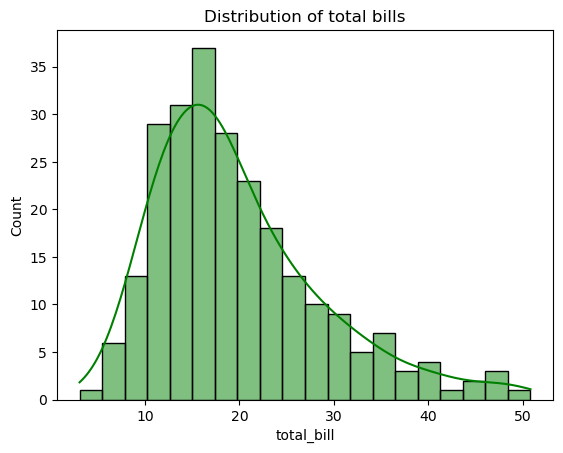

In [82]:
sns.histplot(data=tips,x='total_bill',kde=True,bins=20,color='green')
plt.title("Distribution of total bills")
plt.show()

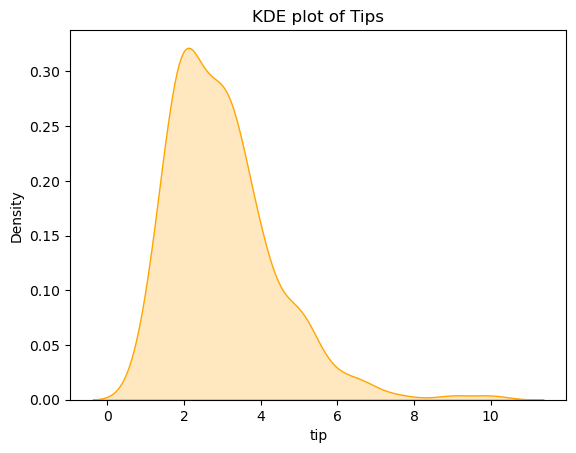

In [90]:
sns.kdeplot(data=tips,x='tip',fill=True,color='orange')
plt.title("KDE plot of Tips")
plt.show()

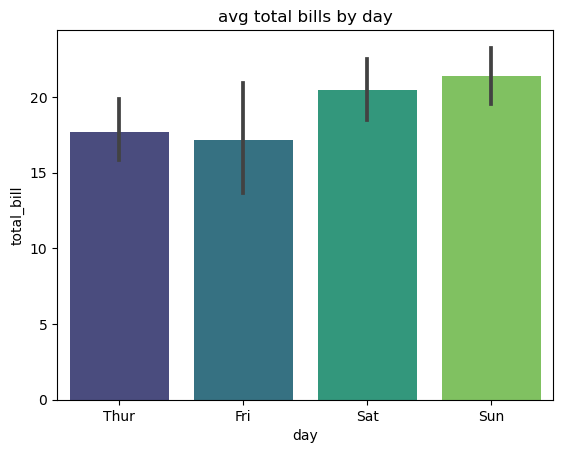

In [91]:
sns.barplot(data=tips,x='day',y='total_bill',palette='viridis')
plt.title("avg total bills by day")
plt.show()

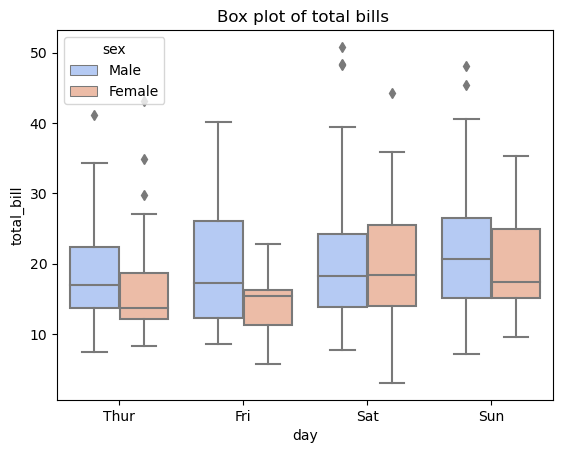

In [93]:
sns.boxplot(data=tips,x='day',y='total_bill',hue='sex',palette='coolwarm')
plt.title("Box plot of total bills ")
plt.show()

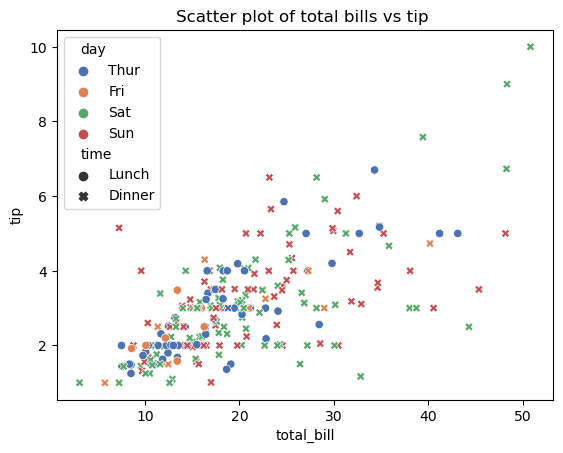

In [96]:
sns.scatterplot(data=tips,x='total_bill',y='tip',hue='day',style="time",palette='deep')
plt.title("Scatter plot of total bills vs tip ")
plt.show()

C:\Users\cvr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


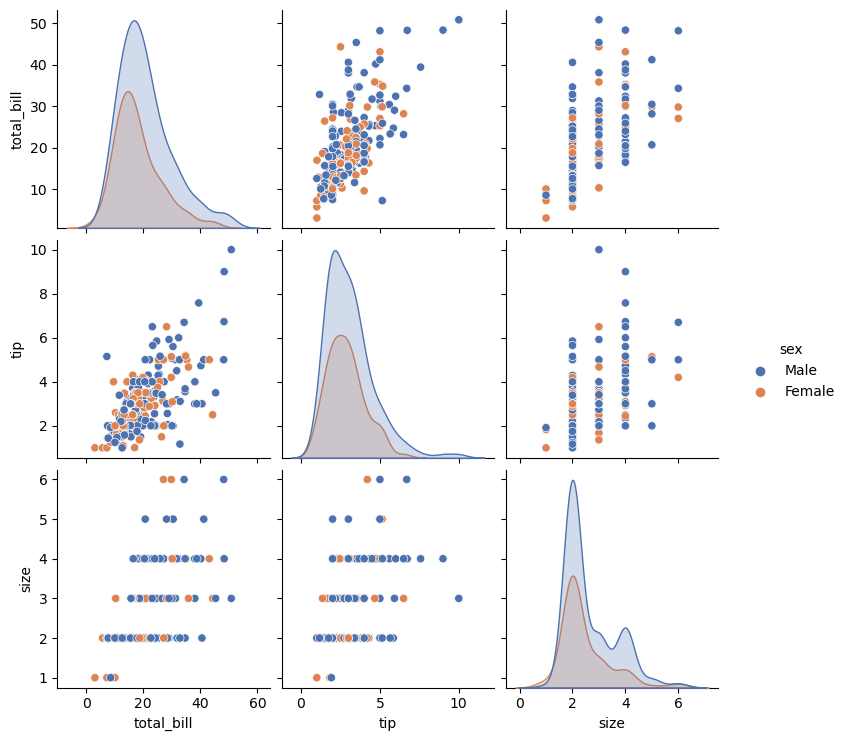

In [97]:
sns.pairplot(data=tips,hue='sex',palette='deep')
plt.show()

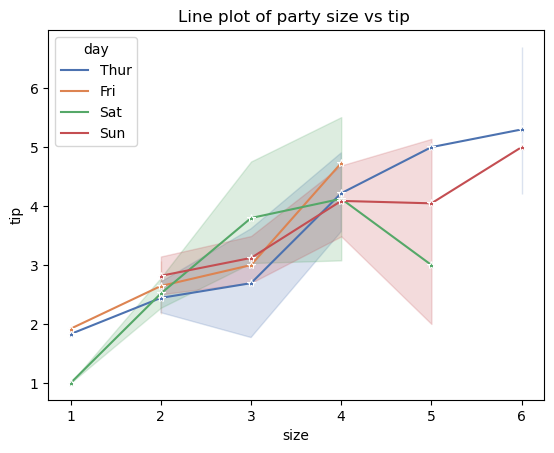

In [107]:
sns.lineplot(data=tips,x='size',y='tip',hue='day',marker='*',palette='deep')
plt.title("Line plot of party size vs tip ")
plt.show()

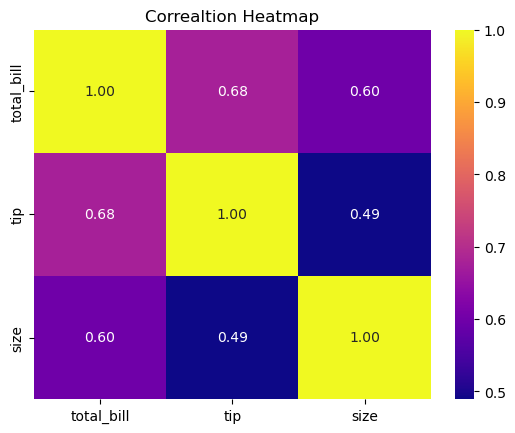

In [106]:
numeric_cols=tips.select_dtypes(include='number')
#heatmap
corr_matrix=numeric_cols.corr()
sns.heatmap(corr_matrix,annot=True,cmap='plasma',fmt=".2f")
plt.title("Correaltion Heatmap")
plt.show()


In [138]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


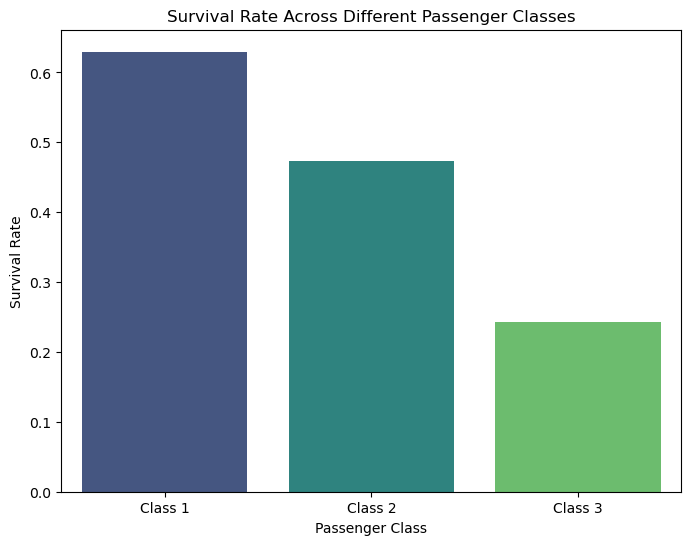

In [140]:
# Calculate survival rate by passenger class
#survival_rate = df.groupby('Pclass')['Survived'].mean()

# Create bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_rate.index, y=survival_rate.values, palette='viridis')
#sns.barplot(data=df,x='Pclass',y='Survived', palette='viridis')
plt.title('Survival Rate Across Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1, 2], labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()


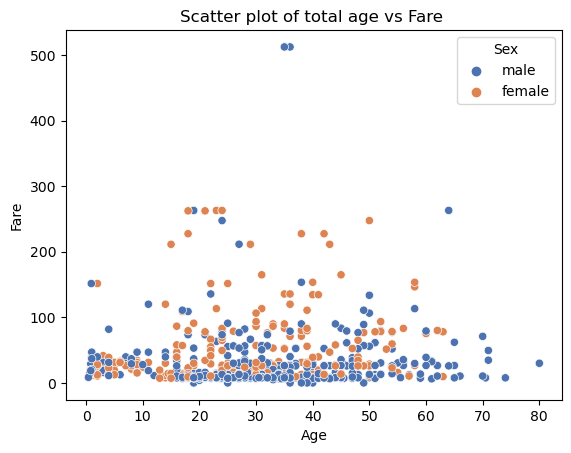

In [141]:
sns.scatterplot(data=df,x='Age',y='Fare',hue='Sex',palette='deep')
plt.title("Scatter plot of total age vs Fare ")
plt.show()

C:\Users\cvr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


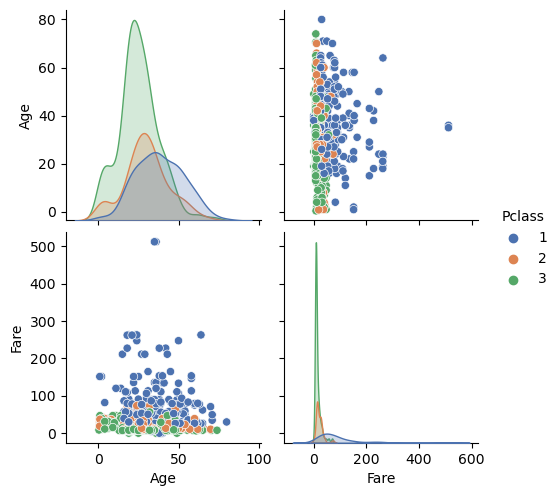

In [142]:
temp=df[['Age','Fare','Pclass']]
sns.pairplot(data=temp,hue='Pclass',palette='deep')
plt.show()

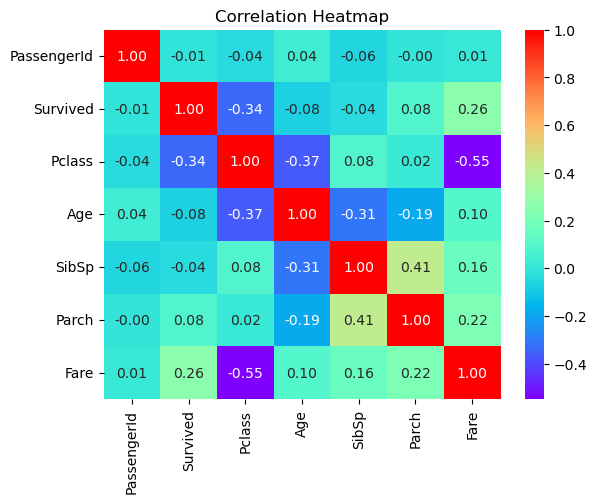

In [147]:
numeric_cols=df.select_dtypes(include='number')
#heatmap
corr_matrix=numeric_cols.corr()
sns.heatmap(corr_matrix,annot=True,cmap='rainbow',fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
